# Page rank

## Cuantificando la importancia de cada documento de una colección

<small><small>
_parte de este contenido  está basado en [esta página](http://nbviewer.ipython.org/github/garth-wells/IA-maths-Ipython/blob/master/notebooks/Lecture12.ipynb)_
</small></small>

Page rank es un algoritmo que mide la importancia (el _rank_) de un documento en función de cuántas otros documentos tienen enlaces apuntándole. Un documento puede ser un archivo de texto de una colección o una página web en la Internet. Páginas o documentos con más enlaces desde otras páginas son más importantes. Del conjunto de páginas de una cierta colección construimos un grafo, donde cada página es un nodo y cada enlace una arista. Por ejemplo, con cinco páginas ($p_1$, ... , $p_5$):

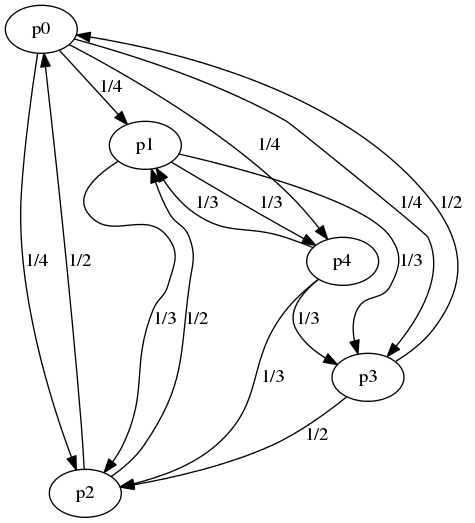

In [1]:
from IPython.display import Image
Image("imgs/page-collection.png")

Observa que cada arista tiene un peso $1/n$ donde $n$ es el número de enlaces salientes de un una página (nodo en el grado). Una forma de ver esto es que cada página _reparte_ la importancia (rank) que tiene entre todas las páginas a las que apunta.

Así, si cuantificamos la importancia (rank) de la página $i$ por $x_{i}$, podemos expresar la relación entre los ranks de todas las páginas:

$$
\begin{align}
x_{0} =& \tfrac{1}{2} x_{2} + \tfrac{1}{2} x_{3}
\\
x_{1} =& \tfrac{1}{4}x_{0} + \tfrac{1}{2}x_{2} + \tfrac{1}{3}x_{4} 
\\
x_{2} =& \tfrac{1}{4}x_{0} + \tfrac{1}{3}x_{1} + \tfrac{1}{2}x_{3} + \tfrac{1}{3}x_{4}
\\
x_{3} =& \tfrac{1}{4}x_{0} + \tfrac{1}{3}x_{1} + \tfrac{1}{3}x_{4}
\\
x_{4} =& \tfrac{1}{4}x_{0} + \tfrac{1}{3}x_{1}
\end{align}
$$

Que a su vez podemos expresar de forma matricial como un sistema de ecuaciones:

$$
\underbrace{
\begin{bmatrix}
0 & 0 & \tfrac{1}{2} & \tfrac{1}{2} & 0
\\
\tfrac{1}{4} & 0 & \tfrac{1}{2} & 0 & \tfrac{1}{3}
\\
\tfrac{1}{4} & \tfrac{1}{3} & 0 & \tfrac{1}{2} & \tfrac{1}{3}
\\
\tfrac{1}{4} & \tfrac{1}{3} & 0 & 0 & \tfrac{1}{3}
\\
\tfrac{1}{4} & \tfrac{1}{3} & 0 & 0 & 0
\end{bmatrix}}_{\boldsymbol{A}}
\begin{bmatrix}
x_{0} \\ x_{1} \\ x_{2} \\ x_{3} \\ x_{4}
\end{bmatrix}
=
\begin{bmatrix}
x_{0} \\ x_{1} \\ x_{2} \\ x_{3} \\ x_{4}
\end{bmatrix}
$$

Y esto es un problema de eigenvectores con  eigenvalor $\lambda = 1$. Para resolverlo tenemos que encontrar el eigenvector correspondiente $[x_0, x_1, x_2, x_3, x_4]$


In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([[ 0.,   0.,         0.5, 0.5, 0.        ],
              [ 0.25, 0.,         0.5, 0.,  0.33333333],
              [ 0.25, 0.33333333, 0.,  0.5, 0.33333333],
              [ 0.25, 0.33333333, 0.,  0.,  0.33333333],
              [ 0.25, 0.33333333, 0.,  0.,  0.        ]])

np.set_printoptions(precision=6)
evalues, evectors = np.linalg.eig(A)

# Print largest eigenvalue and corresponding eigenvector
np.set_printoptions(precision=6)
print("The maxiumum eigenvalue is: {}".format(np.max(evalues)))
evector = evectors[:, np.argmax(evalues)]
evector /= np.linalg.norm(evector, 1)
print("The PageRank vector (eigenvector) is: \n {}".format(evector))

The maxiumum eigenvalue is: (0.999999996452+0j)
The PageRank vector (eigenvector) is: 
 [ 0.215054+0.j  0.225806+0.j  0.258065+0.j  0.172043+0.j  0.129032+0.j]


Esto corresponde con la intuición de que $p_2$ es la página que mayor rank tiene ya que es a la que más referencias se hace, seguida por $p_1$. En cambio $p_4$ es la que menos rank tiene.

Una colección de millones de páginas en la que cada página tiene unos pocos enlaces vendrá representada por una matriz muy grande y muy dispersa. El método usual para obtener los eigenvectores de una matriz implica calcular el determinante lo que es una operación muy pesada computacionalmente y muy poco escalable. Sobre todo cuando la matriz está almacenada de forma distribuida al ser tan grande.

Para poder usar efectivamente esta noción de importancia de páginas (PageRank) cuando tenemos una colección de millones de páginas necesitamos encontrar un método para calcular los eigenvectores de manera escalable. La siguiente sección revisa el concepto de eigenvectores y explica un método de obtención de los mismos basado únicamente en la multiplicación de matrices. En una lección anterior vimos cómo multiplicar matrices dispersas con map-reduce, lo que nos permitirá usar map-reduce para calcular el PageRank de grandes colecciones de páginas web que se referencian entre ellas.

## Revisión vectores y valores propios
tenemos una matriz cuadrada $A$ y si un escalar $\lambda$ y un vector $v$ cumplen la siguiente condición:

$$Av = \lambda v$$

entonces $\lambda$ y $v$ son respectivamente un eigenvalor y su eigenvector asociado (valor y vector propios en español). Es como si, para el vector $v$, la matrix $A$ se comportara como un escalar. 

Dada una matriz cuadrada `A`, `np.linalg.eig` nos devuelve una lista con dos valores:
- un vector con los eigenvalores
- una matriz cuyas columnas corresponden a los eigenvectores

In [2]:
A = np.array([[2,1],[1,-1]])
e = la.eig(A)
for i in range(len(e[0])):
    print "eigenvalor ", i+1,"=", e[0][i]
    print "eigenvector", i+1,"=", e[1][i]
    print "A dot v       =", A.dot(e[1][:,i]) 
    print "lamda v       =", e[0][i] * e[1][:,i]
    print "---"


eigenvalor  1 = 2.30277563773
eigenvector 1 = [ 0.957092 -0.289784]
A dot v       = [ 2.203968  0.667308]
lamda v       = [ 2.203968  0.667308]
---
eigenvalor  2 = -1.30277563773
eigenvector 2 = [ 0.289784  0.957092]
A dot v       = [ 0.377524 -1.246876]
lamda v       = [ 0.377524 -1.246876]
---


## Significado geométrico de los eigenvectores

Consulta [Wikipedia](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)

Si consideramos la matriz $A$ como un operador de transformación lineal sobre vectores, los eigenvectores de $A$ son los vectores cuya dirección no se ve afectada por la transformación que $A$ realiza, y los eigenvalores representan el cambio de magnitud de los eigenvectores bajo la transformación $A$.

Podemos verlo gráficamente. Transformamos dos vectores  cualquiera (no eigenvectores) con la matriz $A$ anterior y los pintamos

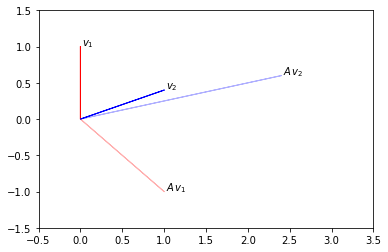

In [3]:
v1 = np.array([0,1])
v2 = np.array([1,0.4])
plt.arrow(0,0,v1[0],v1[1], color="red")
plt.annotate("$v_1$", xy=(v1[0]+0.02, v1[1]+0.02))
plt.arrow(0,0,v2[0],v2[1], color="blue")
plt.annotate("$v_2$", xy=(v2[0]+0.02, v2[1]+0.02))

v1t = A.dot(v1)
v2t = A.dot(v2)
plt.arrow(0,0,v1t[0],v1t[1], color="red", alpha=0.3)
plt.annotate("$A \, v_1$", xy=(v1t[0]+0.02, v1t[1]+0.02))
plt.arrow(0,0,v2t[0],v2t[1], color="blue", alpha=0.3)
plt.annotate("$A \, v_2$", xy=(v2t[0]+0.02, v2t[1]+0.02))

plt.ylim(-1.5,1.5)
plt.xlim(-.5,3.5);

Transformamos ahora dos eigenvectores con la matriz $A$ anterior y los pintamos. Observamos que sus direcciones no cambian bajo la transformación, tan solo sus magnitudes según los eigenvalores de cada eigenvector

[ 2.203968  0.667308]
[ 2.203968  0.667308]


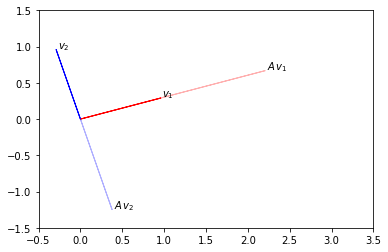

In [4]:
v1 = e[1][:,0]
v2 = e[1][:,1]
plt.arrow(0,0,v1[0],v1[1], color="red")
plt.annotate("$v_1$", xy=(v1[0]+0.02, v1[1]+0.02))
plt.arrow(0,0,v2[0],v2[1], color="blue")
plt.annotate("$v_2$", xy=(v2[0]+0.02, v2[1]+0.02))

v1t = A.dot(v1)
v2t = A.dot(v2)
plt.arrow(0,0,v1t[0],v1t[1], color="red", alpha=0.3)
plt.annotate("$A \, v_1$", xy=(v1t[0]+0.02, v1t[1]+0.02))
plt.arrow(0,0,v2t[0],v2t[1], color="blue", alpha=0.3)
plt.annotate("$A \, v_2$", xy=(v2t[0]+0.02, v2t[1]+0.02))

print e[1][:,0]*e[0][0]
print A.dot(e[1][:,0])

plt.ylim(-1.5,1.5)
plt.xlim(-.5,3.5);

## Entiende las transformaciones lineales

prueba con 

    A = np.array([[2,0],[0,2]])
    A = np.array([[.5,0],[0,.5]])
    A = np.array([[-1,0],[0,1]])
    A = np.array([[0,0],[0,.5]])
    A = np.array([[1,1],[0,1]])
    A = np.array([[1,1],[.2,.5]])



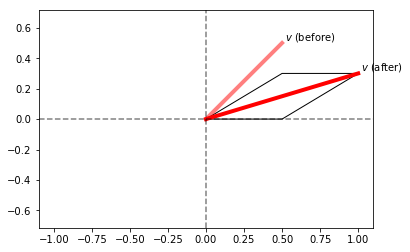

In [126]:
import matplotlib.patches as patches

ax = plt.figure().add_subplot(111)
A = np.array([[1,1],[.1,.5]])
v = np.r_[.5,.5]
plt.plot([0,v[0]],[0,v[1]], color="red", lw=4, alpha=0.5)
plt.annotate("$v$ (before)", xy=(v[0]+0.02, v[1]+0.02))
v = A.dot(v)
x = [0,0.5,v[0],v[0]-.5]
y = [0,0.0,v[1],v[1]]
ax.add_patch(patches.Polygon(xy=zip(x,y), fill=False))
plt.plot([0,v[0]],[0,v[1]], color="red", lw=4, alpha=1)
plt.annotate("$v$ (after)", xy=(v[0]+0.02, v[1]+0.02))


plt.axis('equal')
plt.axhline(0, color="black", ls="--", alpha=.5)
plt.axvline(0, color="black", ls="--", alpha=.5)
plt.ylim(-1.1,1.1)
plt.xlim(-1.1,1.1);

In [48]:
v

array([ 1.,  1.])

## Aproximación de eigenvectores

el cálculo de eigenvectores es computacionalmente pesado y, en la práctica, imposible para matrices muy grandes. Si estamos interesados en el eigenvector correspondiente con el eigenvalor más grande podemos hacer lo siguiente.

Si multiplicamos un vector por una matriz repetidamente, el resultado es un vector que tiende a tener la dirección del eigenvector con el eigenvalor más grande de dicha matriz. Con lo que podemos usar este método para obtener un vector en el cual la relación entre sus componentes es la misma aproximadamente que la del mayor eigenvector.

In [5]:
A = np.array([[2,1],[1,-1]])
e = la.eig(A)

# obtengo analíticamente el eigenvector con mayor eigenvalue
ev = e[1][:,np.argmax(e[0])]

# usamos cualquier vector como punto de partida
v = np.random.rand(A.shape[0])
print "init v", v
# realizamos algunas iteraciones
for i in range(10):
    v = A.dot(v)

# comparamos el eigenvector aproximado con el eigenvector 
# obtenido analiticamente
print "angulo vector aproximado", np.arccos(v[1]/np.sqrt(np.sum(v**2)))
print "angulo eigenvector      ", np.arccos(ev[1]/np.sqrt(np.sum(ev**2)))


init v [ 0.529367  0.397662]
angulo vector aproximado 1.27556795498
angulo eigenvector       1.27679502502


In [6]:
v

array([ 2494.719694,   758.683415])

In [7]:
ev

array([ 0.957092,  0.289784])

In [8]:
v/la.norm(v)

array([ 0.956736,  0.290958])

In [9]:
la.norm(ev)

1.0

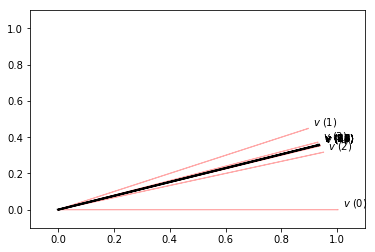

In [37]:
A = np.array([[2,-1],[1,-1]])
v = np.random.rand(A.shape[0])
v = np.r_[1,0]
for i in range(0,20):
    plt.arrow(0,0,v[0],v[1], color="red", alpha=0.3)
    plt.annotate("$v$ (%d)"%i, xy=(v[0]+0.02, v[1]+0.02))
    v = A.dot(v)
    v = v / np.linalg.norm(v)

plt.arrow(0,0,v[0],v[1], color="black", lw=2, alpha=1.)

plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1);